# The Capital Allocation Line: Adding the Risk-free rate




* So far we looked at an investor that is fully invested across risky assets

* In this case, the only way that an investor can change the risk profile of her portfolio is by changing the relative weights across the risky assets

* In practice investors can invest in the risk-free asset, which has zero volatility. 

* This means that they can potentially derisk their portfolio by keeping the relative weights across assets constant and simply invest more in the risk-free asset

* So we will now work with excess returns (which we study in Notebook 3) and the risk-free rate, separating cleaning the risk-free component of these risky asset returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
# url="C:/Users/Alan Moreira/Dropbox/Public/Fin418/Data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
df=Data[['RF','MKT']].copy()
Data.info()

## Using Excess Returns

In [98]:
# here are the excess returns Re=R-rf
Re=(Data[['RF','MKT','WorldxUSA']]).subtract(Data['RF'],axis='index').drop('RF',axis=1)

Re.tail()

,MKT,WorldxUSA
Date,,
2016-08-31,0.0050,0.000638
2016-09-30,0.0025,0.012536
2016-10-31,-0.0202,-0.020583
2016-11-30,0.0486,-0.019898
2016-12-31,0.0182,0.034083


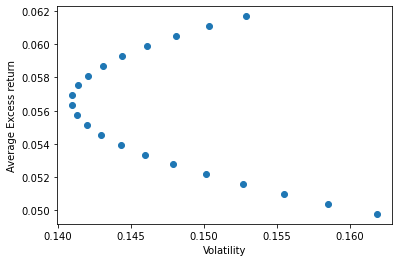

In [99]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    UsW.append([1-x,(W.T @ Re.cov() @ W*12)**0.5,W.T @ np.array(Re.mean())*12])
UsW=np.array(UsW)
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average Excess return')
# plt.ylim([0,0.062])
# plt.xlim([0,0.17])
plt.show()

### Aside: Why not compute the covariance matrix including the risk-free asset?


*   Discuss special treatment of risk-free rate
*   Discuss volatiltiy of rf vs volatility of risky returns
*   Discuss conditional versus unconditional expectations
*   Should we use average rf or the one available at the time of investment?

#### Conditional vs unconditional dice example

* Think about the following setting
* a coin that determines the return realization
    - Head- return X
    - Tails - worth 0
* A six side dice determines the value of X. For example, If dice is 5, X=5%


* How to think about the risk-free rate in this setting?
* How to think about a risky asset with constant expected returns?

    

## Adding the Risk-free Rate

In [103]:
UsW=[]
w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)
rf=0.1/100

# Notations:
  # xf:   position in risk-free rate
  # x:    position in the US market portfolio
  # 1-x:  position in the World market portfolio

for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])


Note that the last term is `+rf` instead of `+rf*xf` because we are using excess return instead of return. To better understand, we write out the expected return in the following way:

$
\begin{align}
E[R_p]&=x_f \times R_f + (1-x_f) \times E[R_R] \\
&= x_f \times R_f + (1-x_f) \times E[(R_R-R_f)] + (1-x_f) \times R_f \\
&= (1-x_f) \times E[(R_R-R_f)] + R_f \\
&=(1-x_f) \times E[R_e] + R_f
\end{align}
$

where $R_R$ is the return on the risky portfolio

In [105]:
UsW[:,0]==0

TypeError: list indices must be integers or slices, not tuple

In [ ]:
UsW[UsW[:,0]==0]

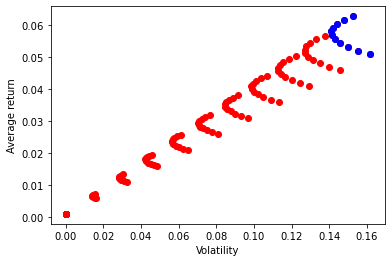

In [106]:
UsW=np.array(UsW)
plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* Why for excess returns do I use the sample average while for the risk-free rate I get the current one?

* What is noteworthy about this plot? What can you see in it?

In [ ]:
# in "variance space"

plt.scatter(UsW[:,2]**2,UsW[:,3],color='red')
plt.scatter(UsW[0:11,2]**2,UsW[0:11,3],color='blue')
plt.xlabel('Variance')
plt.ylabel('Average return')

plt.show()

* It is clear that someone that would like a lower risk profile can achieve this objective through the use of the risk-free asset without impacting expected returns as much

* What about investors that would like to take more risk, can they benefit of the risk-free asset?

* yes, if they can borrow at the risk-free rate

In [ ]:
UsW=[]
w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)
rf=0
for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])

w=np.arange(0,1.1,0.1)
wf=np.arange(-0.5,0,0.1)

for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])
        
        
UsW=np.array(UsW)

plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')
plt.scatter(UsW[UsW[:,0]<0,2],UsW[UsW[:,0]<0,3],color='orange')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

In [ ]:
UsW

In [ ]:
plt.scatter(UsW[:,1],UsW[:,3]/UsW[:,2])

* What is the intepretation of a negative $w_f$? Doe it make sense?

* What is the interpretation of a $w_f$ above 1? Does it make sense?

* Is the investors likely to be able to borrow at the risk-free rate?